In [30]:
from keras import models
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Load data

In [31]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Prepare data

In [32]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Show the data

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


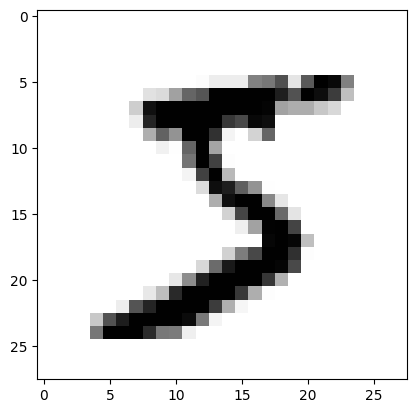

In [33]:
plt.imshow(train_images[0].reshape(28, 28), cmap=plt.cm.binary)
print(train_labels[0])

Construct model

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Train the model

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 20s 21ms/step - loss: 0.1806 - accuracy: 0.9436 - val_loss: 0.0447 - val_accuracy: 0.9858
Epoch 2/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0336 - val_accuracy: 0.9893
Epoch 3/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0335 - accuracy: 0.9901 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0253 - accuracy: 0.9923 - val_loss: 0.0252 - val_accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.0264 - val_accuracy: 0.9923


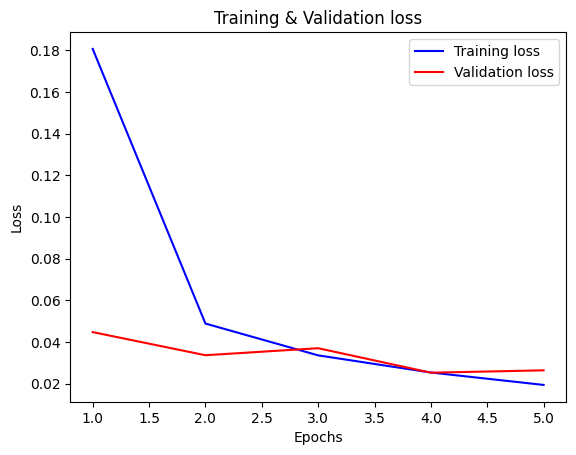

In [36]:


history_dic = history.history
loss_value = history_dic['loss']
val_loss_values = history_dic['val_loss']

epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, 'b', label = "Training loss")
plt.plot(epochs, val_loss_values, 'r', label = "Validation loss")
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

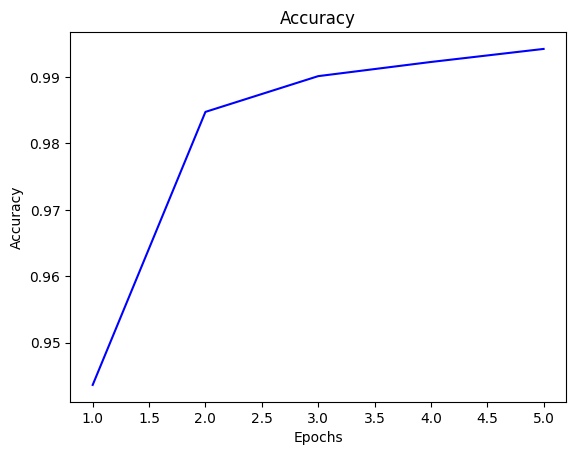

In [37]:
acc_value = history_dic['accuracy']

epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, acc_value, 'b')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [38]:
print(history.history)

{'loss': [0.18060508370399475, 0.04881715774536133, 0.03354696184396744, 0.025319091975688934, 0.019365131855010986], 'accuracy': [0.9436333179473877, 0.984749972820282, 0.9901333451271057, 0.9922666549682617, 0.9942333102226257], 'val_loss': [0.04470819979906082, 0.03361750766634941, 0.03698130324482918, 0.025238141417503357, 0.026364745572209358], 'val_accuracy': [0.98580002784729, 0.989300012588501, 0.9883000254631042, 0.9925000071525574, 0.9922999739646912]}


In [39]:
result = model.evaluate(test_images, test_labels)
print(result)

313/313 [==============================] - 2s 5ms/step - loss: 0.0264 - accuracy: 0.9923
[0.02636474370956421, 0.9922999739646912]


Using custom image to predic

In [44]:
from PIL import Image
image1 = Image.open(r'test image/5.jpg')
image2 = Image.open(r'test image/2.jpg')
images = [image1, image2]
t_labels = [5, 2]
# image = image.convert('RGB')
# plt.imshow(image)
# plt.show
def img_prediction(img):
    img_gray = img.convert('L')
    img_gray = img_gray.resize((28, 28))
    img_array_gray = np.array(img_gray)
    img_array_gray = np.expand_dims(img_array_gray, axis=-1)
    img_array_gray = img_array_gray / 255.0
    img_array = np.expand_dims(img_array_gray, axis=0)
    prediction = model.predict(img_array)
    return(np.argmax(prediction))

tp = 0
tn = 0
fp = 0
fn = 0

for img,label in zip(images,t_labels):
    pred = img_prediction(img)
    if pred == label:
        if pred == 5:  # Positive class is '5'
            tp += 1
        else:
            tn += 1
    else:
        if pred == 5:  # Positive class is '5'
            fp += 1
        else:
            fn += 1

# Calculate metrics
accuracy = (tp + tn) / len(images)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
    



1/1 [==============================] - 0s 14ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
